# PROJECT-10

# PIMA DIABETES

# LOADING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# LOADING DATASET

In [2]:
data=pd.read_csv("pima.csv")
data.head()

,Pregnancy,Glucose,Blodd Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancy,Glucose,Blodd Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancy                     768 non-null int64
Glucose                       768 non-null int64
Blodd Pressure                768 non-null int64
Skin Thickness                768 non-null int64
Insulin                       768 non-null int64
BMI                           768 non-null float64
Diabetes Pedigree Function    768 non-null float64
Age                           768 non-null int64
Outcome                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.dtypes

Pregnancy                       int64
Glucose                         int64
Blodd Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes Pedigree Function    float64
Age                             int64
Outcome                         int64
dtype: object

In [6]:
data.describe()

,Pregnancy,Glucose,Blodd Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.corr()

,Pregnancy,Glucose,Blodd Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancy,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blodd Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes Pedigree Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.skew()

Pregnancy                     0.901674
Glucose                       0.173754
Blodd Pressure               -1.843608
Skin Thickness                0.109372
Insulin                       2.272251
BMI                          -0.428982
Diabetes Pedigree Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

In [9]:
data.isnull().sum()

Pregnancy                     0
Glucose                       0
Blodd Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

# CHECKING OUTLIERS

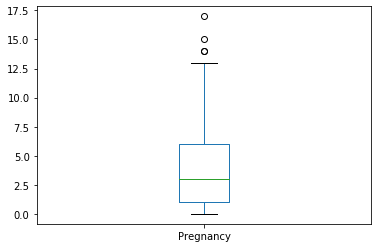

In [10]:
data["Pregnancy"].plot.box()

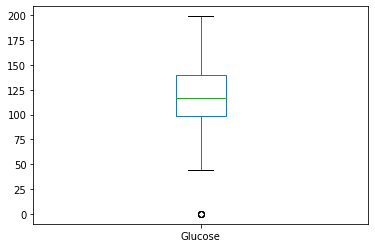

In [11]:
data["Glucose"].plot.box()

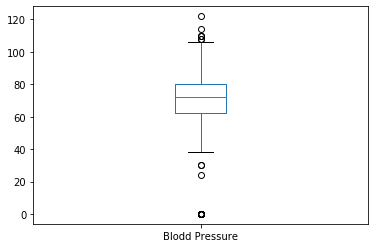

In [12]:
data["Blodd Pressure"].plot.box()

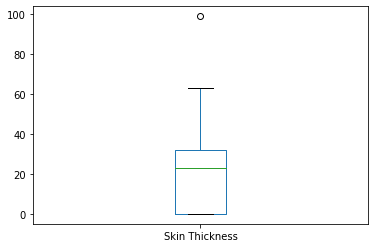

In [13]:
data["Skin Thickness"].plot.box()

# REMOVING OUTLIERS

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [15]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [16]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,Pregnancy,Glucose,Blodd Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
data_new.skew()

Pregnancy                     0.814931
Glucose                       0.574478
Blodd Pressure                0.133396
Skin Thickness               -0.079466
Insulin                       1.252364
BMI                           0.374415
Diabetes Pedigree Function    1.181635
Age                           1.047105
Outcome                       0.724938
dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(data_new.astype(float))
data_new

array([[0.46153846, 0.67096774, 0.48979592, ..., 0.39696312, 0.61702128,
        1.        ],
       [0.07692308, 0.26451613, 0.42857143, ..., 0.19739696, 0.21276596,
        0.        ],
       [0.61538462, 0.89677419, 0.40816327, ..., 0.42950108, 0.23404255,
        1.        ],
       ...,
       [0.38461538, 0.49677419, 0.48979592, ..., 0.12075199, 0.19148936,
        0.        ],
       [0.07692308, 0.52903226, 0.36734694, ..., 0.19595083, 0.55319149,
        1.        ],
       [0.07692308, 0.31612903, 0.46938776, ..., 0.17136659, 0.04255319,
        0.        ]])

In [19]:
df=pd.DataFrame(data_new)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021,1.0
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766,0.0
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043,1.0
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000,0.0
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489,0.0


# VISUALIZATION

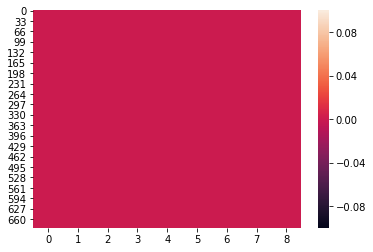

In [20]:
sns.heatmap(df.isnull())

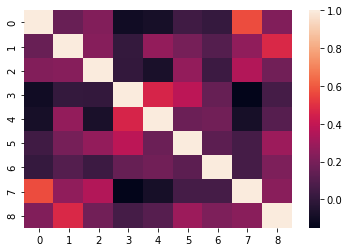

In [21]:
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000051A9358>,
      dtype=object)

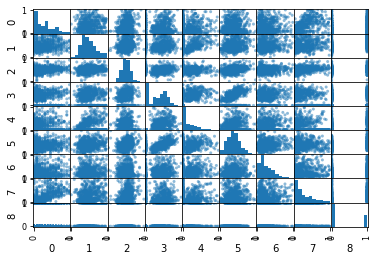

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDE1860>,
      dtype=object)

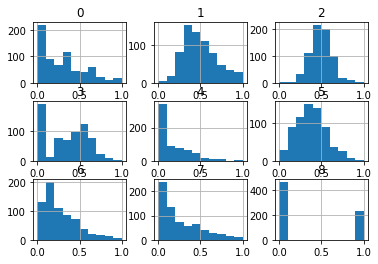

In [23]:
df.hist()

# SPLITTING THE DATA INTO x AND y

In [24]:
x=df.drop(8,axis=1)
x.head()

,0,1,2,3,4,5,6,7
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489


In [25]:
y=df[8]
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: 8, dtype: float64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=142)

In [55]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8344827586206897
[[98  8]
 [16 23]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       106
         1.0       0.74      0.59      0.66        39

    accuracy                           0.83       145
   macro avg       0.80      0.76      0.77       145
weighted avg       0.83      0.83      0.83       145



In [56]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7103448275862069
[[87 19]
 [23 16]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       106
         1.0       0.46      0.41      0.43        39

    accuracy                           0.71       145
   macro avg       0.62      0.62      0.62       145
weighted avg       0.70      0.71      0.71       145



In [57]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7310344827586207
[[79 27]
 [12 27]]
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80       106
         1.0       0.50      0.69      0.58        39

    accuracy                           0.73       145
   macro avg       0.68      0.72      0.69       145
weighted avg       0.77      0.73      0.74       145



In [58]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8482758620689655
[[99  7]
 [15 24]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       106
         1.0       0.77      0.62      0.69        39

    accuracy                           0.85       145
   macro avg       0.82      0.77      0.79       145
weighted avg       0.84      0.85      0.84       145



In [61]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7862068965517242
[[89 17]
 [14 25]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       106
         1.0       0.60      0.64      0.62        39

    accuracy                           0.79       145
   macro avg       0.73      0.74      0.73       145
weighted avg       0.79      0.79      0.79       145



In [59]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8482758620689655
[[99  7]
 [15 24]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       106
         1.0       0.77      0.62      0.69        39

    accuracy                           0.85       145
   macro avg       0.82      0.77      0.79       145
weighted avg       0.84      0.85      0.84       145



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [63]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
cv=cross_val_score(rfc,x_train,y_train,scoring='accuracy',cv=5)
cv.std()
cv.mean()

0.7458545701664967

In [65]:
params=[{
            
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(rfc,params,cv=10,scoring='accuracy',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
gc.best_score_

0.7900552486187845

In [67]:
print("Logistic:",(accuracy_score(y_test,predlg)))
print("DTC:",accuracy_score(y_test,preddtc))
print("KNN:",accuracy_score(y_test,predknn))
print("SVC_linear:",accuracy_score(y_test,predsvc))
print("SVC_rbf:",accuracy_score(y_test,predsv))
print("GussianNB:",accuracy_score(y_test,predgnb))

Logistic: 0.8344827586206897
DTC: 0.7310344827586207
KNN: 0.7103448275862069
SVC_linear: 0.8482758620689655
SVC_rbf: 0.8482758620689655
GussianNB: 0.7862068965517242


In [68]:
#MODEL SAVING
from sklearn.externals import joblib
joblib.dump(svc,"Pima.pkl")

['Pima.pkl']